In [3]:
# Import Libraries
import os
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
import calendar

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Clenup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:

# Filter Data for Specific Job Titles
df_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Drop NaN values in 'salary_year_avg'
df_DA_US = df_US.dropna(subset=['salary_year_avg'])


# Filter Data for Specific Job Titles
df_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Drop NaN values in 'salary_year_avg'
df_DA_US = df_US.dropna(subset=['salary_year_avg'])

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

#sort by median salary
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

# sort by count (fix: do not re-sort by median)
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10)

/tmp/ipykernel_33758/4282141140.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_DA_top_pay_sorted, x='median', y=df_DA_top_pay_sorted.index, ax=ax[0], palette='dark:b_r')
/tmp/ipykernel_33758/4282141140.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_DA_skills_sorted, x='count', y=df_DA_skills_sorted.index, ax=ax[1], palette='Blues_d')


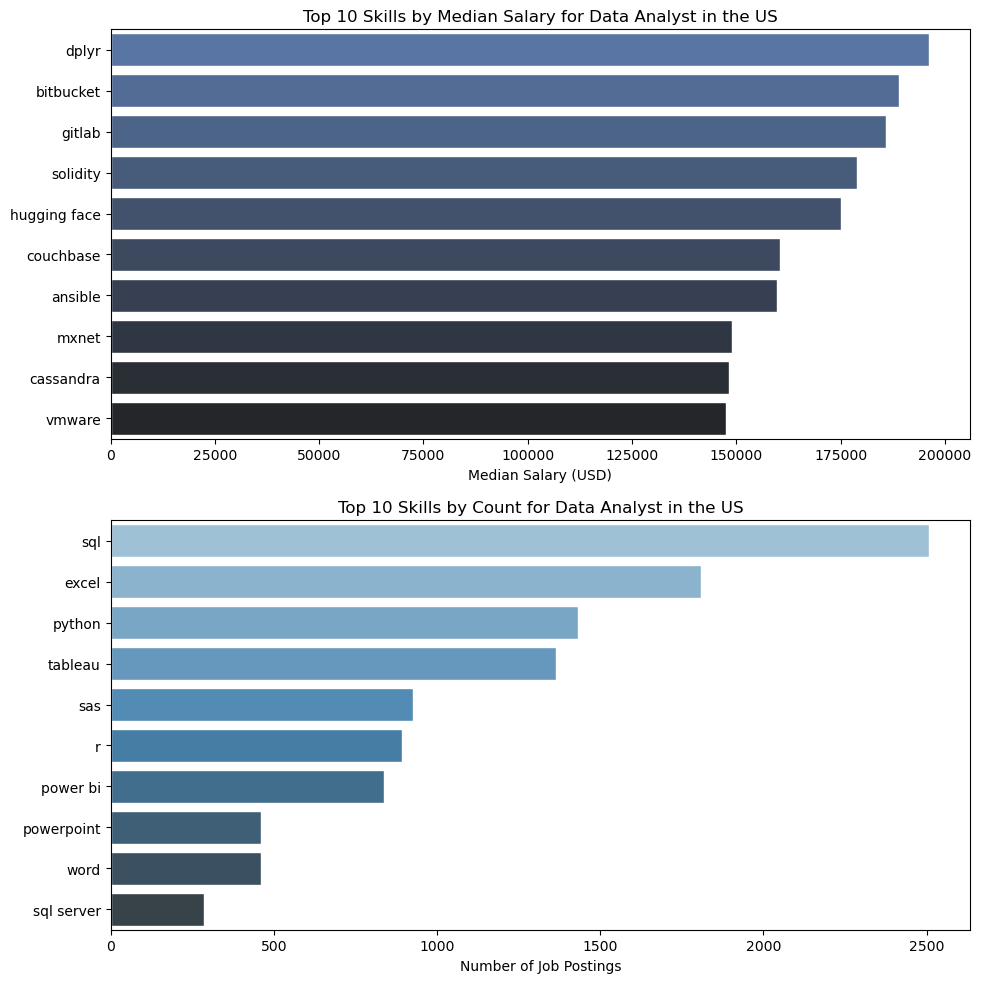

In [5]:
fig, ax = plt.subplots(2,1, figsize=(10, 10))
sns.set_theme(style="ticks")

# Sort by median and count in descending order
df_DA_top_pay_sorted = df_DA_top_pay.sort_values('median', ascending=False)
df_DA_skills_sorted = df_DA_skills.sort_values('count', ascending=False)

# Top 10 Skills by Median Salary (largest at top)
sns.barplot(data=df_DA_top_pay_sorted, x='median', y=df_DA_top_pay_sorted.index, ax=ax[0], palette='dark:b_r')
ax[0].set_title('Top 10 Skills by Median Salary for Data Analyst in the US')
ax[0].set_xlabel('Median Salary (USD)')
ax[0].set_ylabel('')

# Top 10 Skills by Count (largest at top)
sns.barplot(data=df_DA_skills_sorted, x='count', y=df_DA_skills_sorted.index, ax=ax[1], palette='Blues_d')
ax[1].set_title('Top 10 Skills by Count for Data Analyst in the US')
ax[1].set_xlabel('Number of Job Postings')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

(0.0, 200000.0)

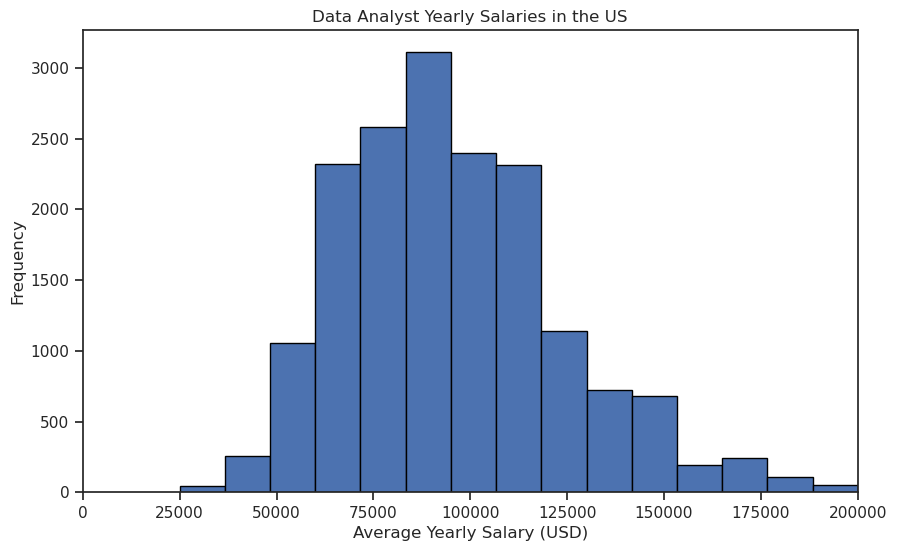

In [6]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black', figsize=(10, 6))
plt.title('Data Analyst Yearly Salaries in the US')
plt.xlabel('Average Yearly Salary (USD)')
plt.ylabel('Frequency')
plt.xlim(0, 200000)

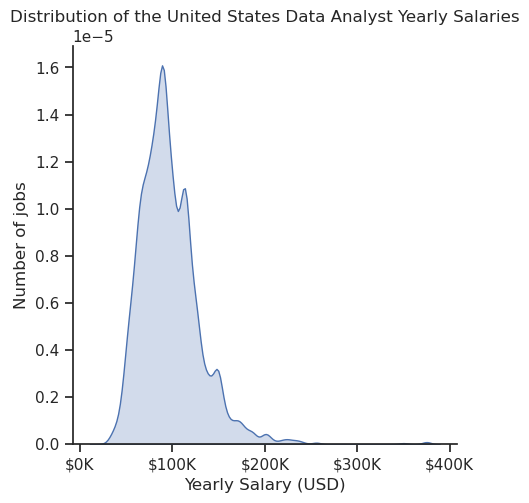

In [7]:
sns.set_theme(style='ticks')
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
plt.title('Distribution of the United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))
plt.show()